<a href="https://colab.research.google.com/github/harshbhanderi/DATA690-WANG/blob/master/Individual%20Project/Final%20Project%20Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DS 690: Individual Project (Deliverable #3 - Descriptive Statistics)

#### - Harsh Bhanderi

## YouTube Trending Videos Analysis

YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. 
According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). 
Note that they’re not the most-viewed videos overall for the calendar year”. 
Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

The dataset I choose is This is a daily record of the top trending YouTube videos. 
This dataset includes several months (and counting) of data on daily trending YouTube videos. 
Data is included for the US, GB, DE, CA, RU, MX, KR, JP, IN and FR regions (USA, Great Britain, Germany, Canada, Russia, Mexico, South Korea, Japan, India and France, respectively), with up to 200 listed trending videos per day.
Each region’s data is in a separate file. 
Data includes the video title, channel title, publish time, tags, views, likes and dislikes, description, and comment count. 
The data also includes a category_id field, which varies between regions.
This dataset was collected using the YouTube API. https://github.com/mitchelljy/Trending-YouTube-Scraper

Possible uses for this dataset could include:
-	Sentiment analysis in a variety of forms
-	Categorizing YouTube videos based on their comments and statistics.
-	Training ML algorithms like RNNs to generate their own YouTube comments.
-	Analyzing what factors affect how popular a YouTube video will be.
-	Statistical analysis over time


I will find for some informations like:

- What is the most frequent type of video?
- The distribuition of views, likes, comments and engamet is equal for all category's?
- We have normal distribuition to the values?
- Whats the most frequent names in title, description, tags?

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # For visualization 
import seaborn as sns  # visualization tool
import matplotlib as mpl

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os # Find path of current working directory
os.getcwd()

'/content'

## Dataset columns
- video_id
- trending_date
- title
- channel_title
- category_id
- publish_time
- tags
- views
- likes
- dislikes
- comment_count
- thumbnail_link
- comments_disabled
- ratings_disabled
- video_error_or_removed
- description

In [0]:
df_US = pd.read_csv("USvideos.csv")
df_US.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Checking for null values

In [0]:
df_US.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [0]:
df_US.corr(method='pearson')

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011
views,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256
likes,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641
dislikes,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853
comment_count,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725
comments_disabled,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970
ratings_disabled,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526
video_error_or_removed,-0.030011,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000


In [0]:
df_US['category_name'] = np.nan

df_US.loc[(df_US["category_id"] == 1),"category_name"] = 'Film and Animation'
df_US.loc[(df_US["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df_US.loc[(df_US["category_id"] == 10),"category_name"] = 'Music'
df_US.loc[(df_US["category_id"] == 15),"category_name"] = 'Pets and Animals'
df_US.loc[(df_US["category_id"] == 17),"category_name"] = 'Sport'
df_US.loc[(df_US["category_id"] == 19),"category_name"] = 'Travel and Events'
df_US.loc[(df_US["category_id"] == 20),"category_name"] = 'Gaming'
df_US.loc[(df_US["category_id"] == 22),"category_name"] = 'People and Blogs'
df_US.loc[(df_US["category_id"] == 23),"category_name"] = 'Comedy'
df_US.loc[(df_US["category_id"] == 24),"category_name"] = 'Entertainment'
df_US.loc[(df_US["category_id"] == 25),"category_name"] = 'News and Politics'
df_US.loc[(df_US["category_id"] == 26),"category_name"] = 'How to and Style'
df_US.loc[(df_US["category_id"] == 27),"category_name"] = 'Education'
df_US.loc[(df_US["category_id"] == 28),"category_name"] = 'Science and Technology'
df_US.loc[(df_US["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df_US.loc[(df_US["category_id"] == 25),"category_name"] = 'News & Politics'

In [0]:
print(df_US.category_name.value_counts())

Entertainment               9964
Music                       6472
How to and Style            4146
Comedy                      3457
People and Blogs            3210
News & Politics             2487
Science and Technology      2401
Film and Animation          2345
Sport                       2174
Education                   1656
Pets and Animals             920
Gaming                       817
Travel and Events            402
Cars and Vehicles            384
Non Profits and Activism      57
Name: category_name, dtype: int64


# Number of Video in each Category

Text(0, 0.5, 'Count')

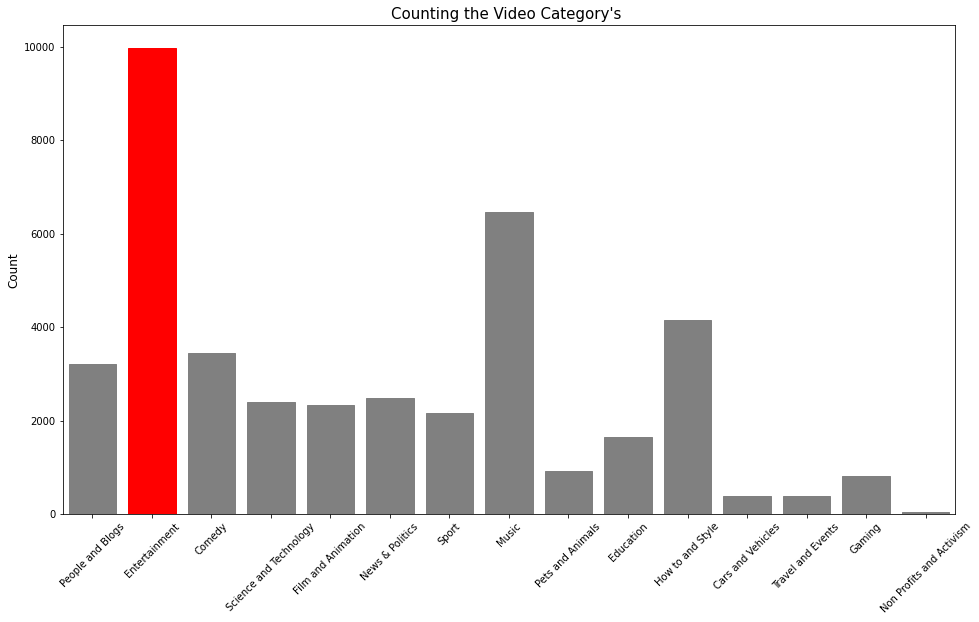

In [0]:
plt.figure(figsize = (16,9))
ax = sns.countplot(x="category_name", data=df_US,  orient ='H')
for bar in ax.patches:
    if bar.get_height() > 8000:
        bar.set_color('red')    
    else:
        bar.set_color('grey')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Counting the Video Category's ", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("Count", fontsize=12)

## Views count per years

In [0]:
best_count = df_US[['channel_title', 'views', 'publish_time']]
best_count = best_count.sort_values('views', ascending = False)
best_count['publish_time'] = pd.DatetimeIndex(df_US['publish_time']).year


Text(0, 0.5, 'Count')

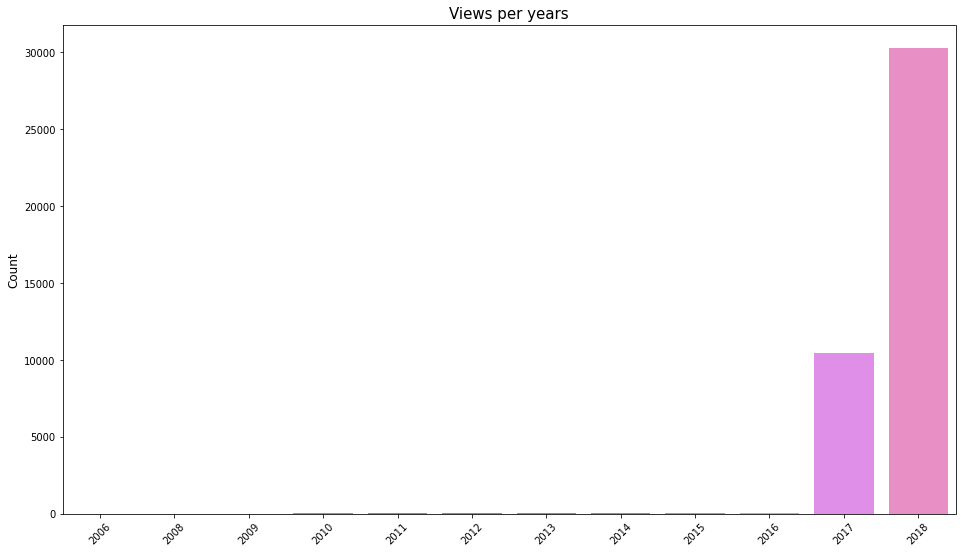

In [0]:
plt.figure(figsize = (16,9))
ax = sns.countplot(x="publish_time", data=best_count)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Views per years", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("Count", fontsize=12)

## likes count per years

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Likes')

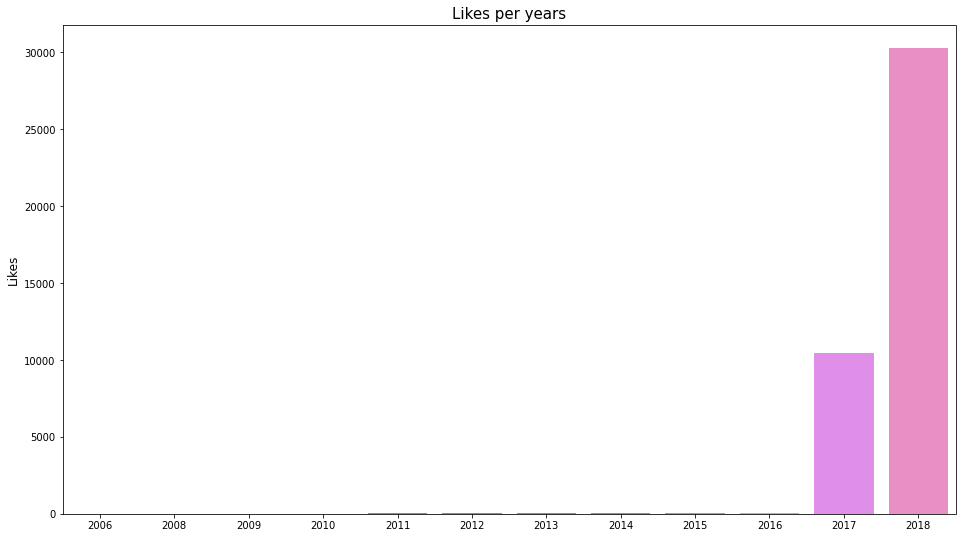

In [0]:
like= df_US[['likes', 'publish_time']]
plt.figure(figsize = (16,9))
like['publish_time'] = pd.DatetimeIndex(like['publish_time']).year
ax = sns.countplot(x="publish_time", data=like)
ax.set_title("Likes per years", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("Likes", fontsize=12)

# Word Cloud To track the trend in channels

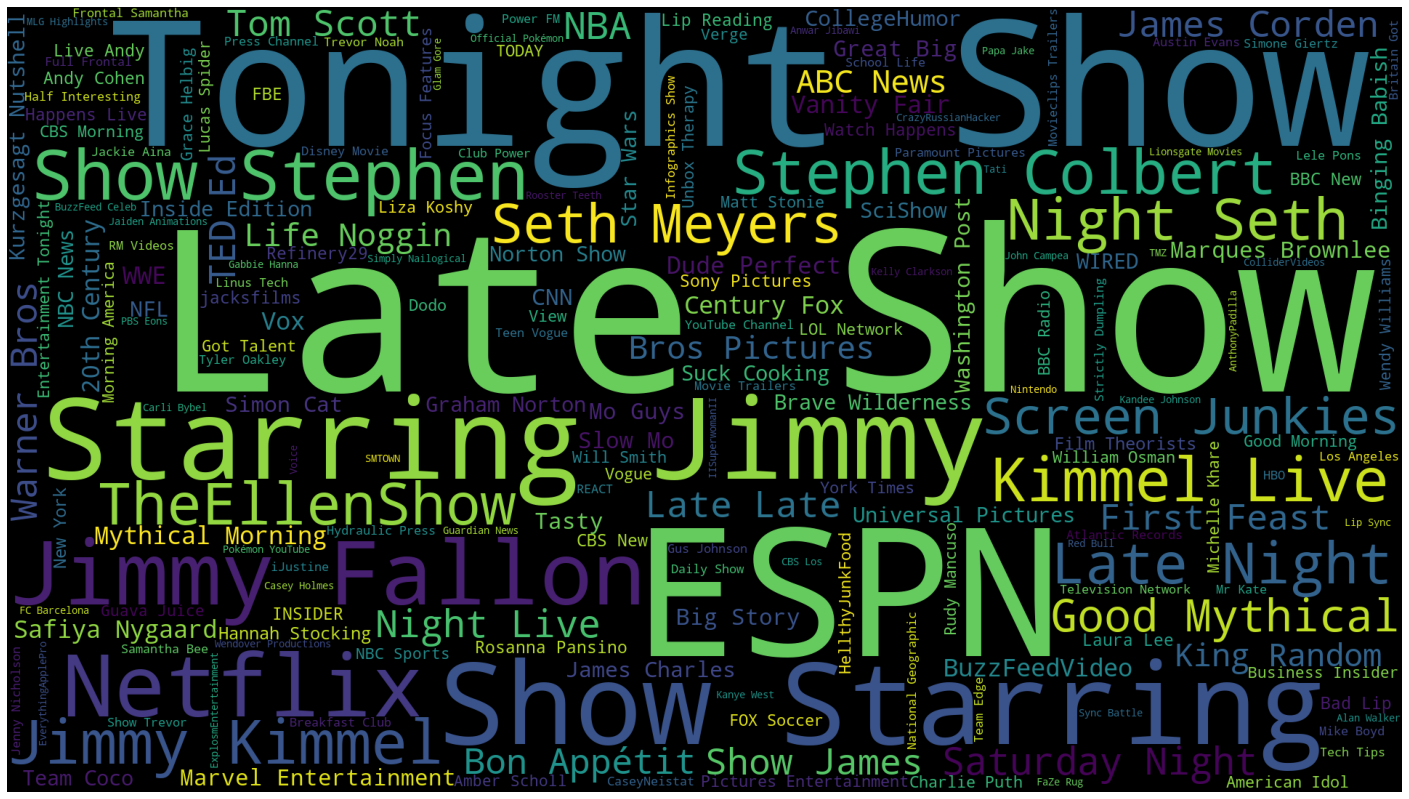

In [0]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df_US.channel_title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

## Best 12 Channels view comparison 

In [0]:
Best_twl = df_US[['channel_title', 'views']]
Best_twl = Best_twl.groupby('channel_title')['views'].sum()
Best_twl = pd.DataFrame(Best_twl)
Best_twl = Best_twl.sort_values('views', ascending=False)
Best_twl = Best_twl[:12]
Best_twl= Best_twl.reset_index()
Best_twl.head()

,channel_title,views
0,ChildishGambinoVEVO,3758488765
1,ibighit,2235906679
2,Dude Perfect,1870085178
3,Marvel Entertainment,1808998971
4,ArianaGrandeVevo,1576959172


Text(0, 0.5, 'Views Counts')

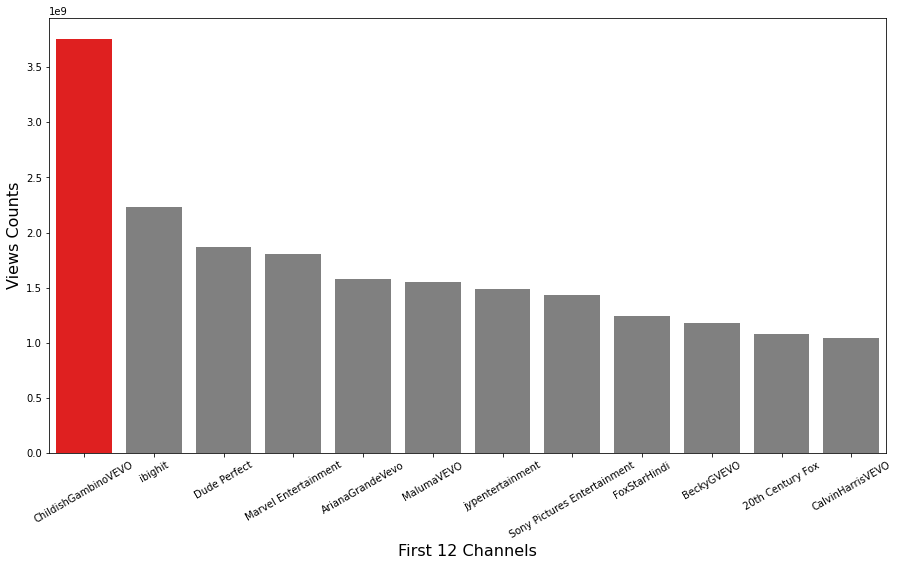

In [0]:
plt.figure(figsize=(15, 8))
c = ['red', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']
ax = sns.barplot(data = Best_twl, x = 'channel_title', y ='views', palette =c)
ax.set_xticklabels(labels= Best_twl.channel_title, fontsize=10, rotation=30)
ax.set_xlabel(xlabel='First 12 Channels', fontsize=16)
ax.set_ylabel(ylabel='Views Counts', fontsize=16)

# Added videos in every year

In [0]:
year = df_US[['publish_time','video_id']]
year['publish_time'] = pd.DatetimeIndex(year['publish_time']).year
year = year.groupby('publish_time')['video_id'].count()
year = pd.DataFrame(year)
year = year.sort_values('publish_time', ascending=False)
year= year.reset_index()
year.head(11)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,publish_time,video_id
0,2018,30279
1,2017,10428
2,2016,35
3,2015,35
4,2014,32
5,2013,44
6,2012,24
7,2011,27
8,2010,19
9,2009,14


## Correlation between 'likes', 'dislikes', 'views' And category

In [0]:
df_US_1 = df_US[['likes', 'dislikes', 'views', 'category_id']]

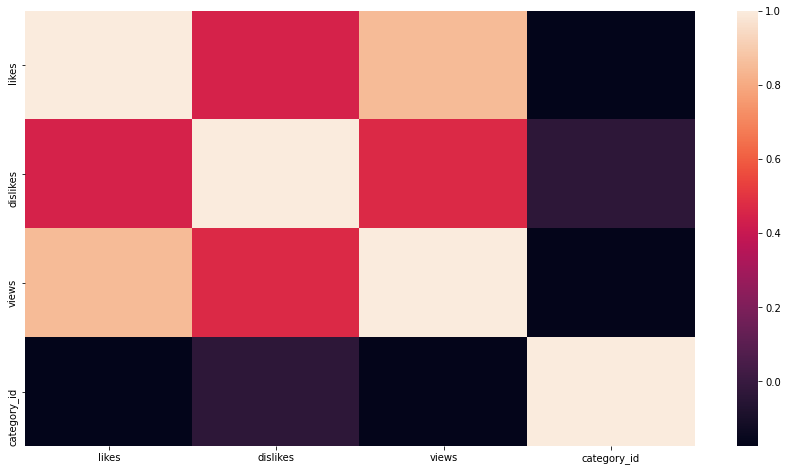

In [0]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_US_1.corr())

<h2>Let's start looking if Views, likes, dislikes and comment counts have a normal distribuition</h2>

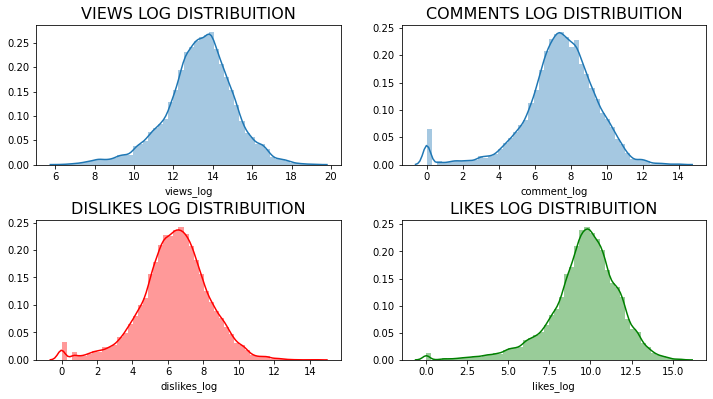

In [0]:
df_US['likes_log'] = np.log(df_US['likes'] + 1)
df_US['views_log'] = np.log(df_US['views'] + 1)
df_US['dislikes_log'] = np.log(df_US['dislikes'] + 1)
df_US['comment_log'] = np.log(df_US['comment_count'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(df_US['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_US['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df_US['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df_US['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

In [0]:
print("Views quantiles")
print(df_US['views'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(df_US['likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(df_US['dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(df_US['comment_count'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01        4209.84
0.25      242329.00
0.50      681861.00
0.75     1823157.00
0.99    29917344.32
Name: views, dtype: float64

Likes quantiles
0.01        15.00
0.25      5424.00
0.50     18091.00
0.75     55417.00
0.99    923015.92
Name: likes, dtype: float64

Dislikes quantiles
0.01        1.00
0.25      202.00
0.50      631.00
0.75     1938.00
0.99    43562.28
Name: dislikes, dtype: float64

Comment quantiles
0.01         0.0
0.25       614.0
0.50      1856.0
0.75      5755.0
0.99    100603.6
Name: comment_count, dtype: float64


In [0]:
df_US['category_name'] = np.nan

df_US.loc[(df_US["category_id"] == 1),"category_name"] = 'Film and Animation'
df_US.loc[(df_US["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df_US.loc[(df_US["category_id"] == 10),"category_name"] = 'Music'
df_US.loc[(df_US["category_id"] == 15),"category_name"] = 'Pets and Animals'
df_US.loc[(df_US["category_id"] == 17),"category_name"] = 'Sport'
df_US.loc[(df_US["category_id"] == 19),"category_name"] = 'Travel and Events'
df_US.loc[(df_US["category_id"] == 20),"category_name"] = 'Gaming'
df_US.loc[(df_US["category_id"] == 22),"category_name"] = 'People and Blogs'
df_US.loc[(df_US["category_id"] == 23),"category_name"] = 'Comedy'
df_US.loc[(df_US["category_id"] == 24),"category_name"] = 'Entertainment'
df_US.loc[(df_US["category_id"] == 25),"category_name"] = 'News and Politics'
df_US.loc[(df_US["category_id"] == 26),"category_name"] = 'How to and Style'
df_US.loc[(df_US["category_id"] == 27),"category_name"] = 'Education'
df_US.loc[(df_US["category_id"] == 28),"category_name"] = 'Science and Technology'
df_US.loc[(df_US["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df_US.loc[(df_US["category_id"] == 25),"category_name"] = 'News & Politics'

<h2>Looking the Views, likes, dislikes distribuition by category_name's</h2>

Category Name count
Entertainment       9964
Music               6472
How to and Style    4146
Comedy              3457
People and Blogs    3210
Name: category_name, dtype: int64


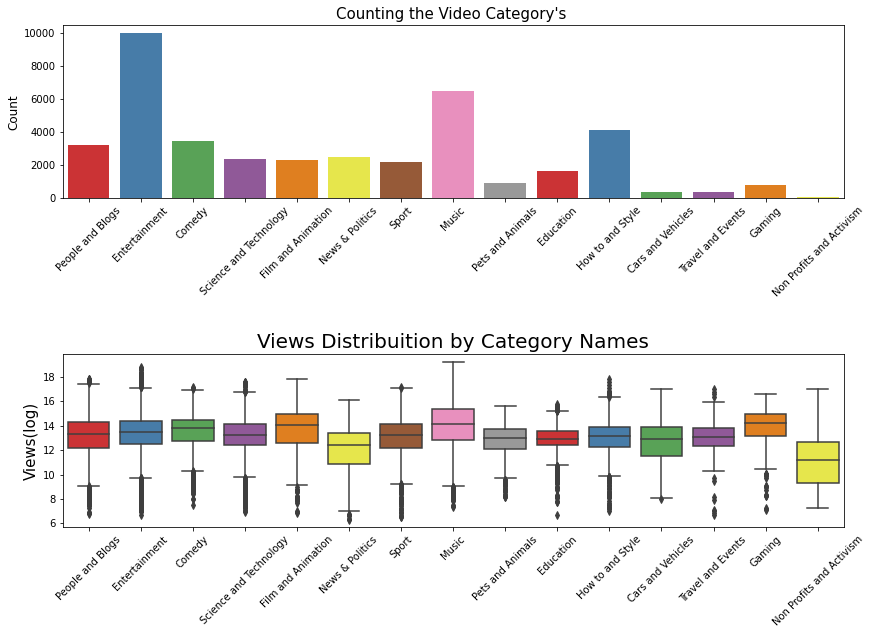

In [0]:
print("Category Name count")
print(df_US.category_name.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category_name', data=df_US, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='views_log', data=df_US, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

Significant number of politics and news videos.

The unique difference is in Non Profits and Activism videos that have less views than the "normal" videos


<h2>Looking the Views, likes, dislikes distribuition by category_name's</h2>

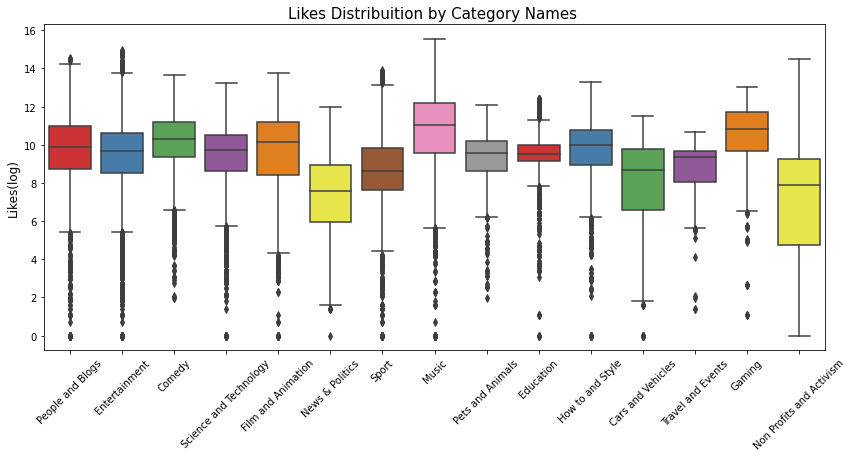

In [0]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='likes_log', data=df_US, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

News and Politics have a the same of Non Profits of engagement likes

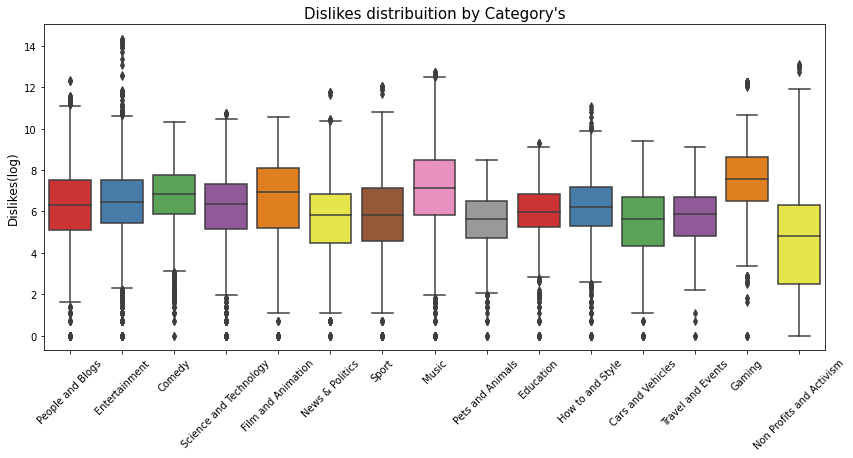

In [0]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='dislikes_log', data=df_US, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes distribuition by Category's", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.show()

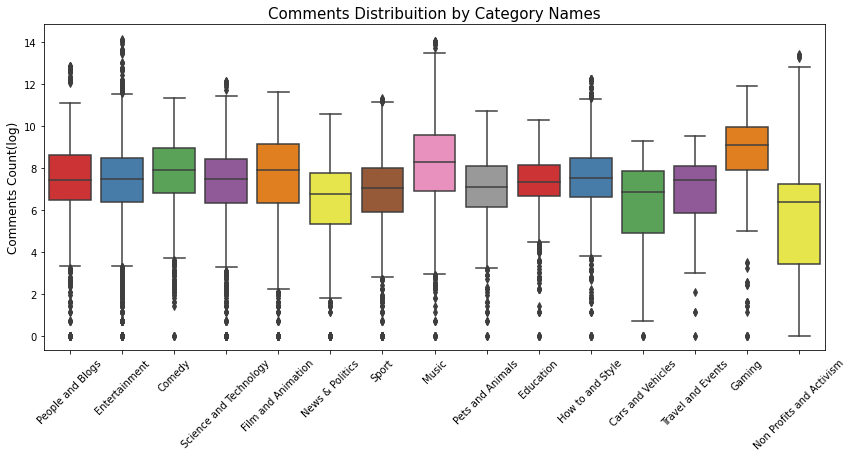

In [0]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='comment_log', data=df_US, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribuition by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.show()

<h1>Engagement Features </h1>

I will create some new variables to us analyse the percent of likes, dislikes, comment by each category to discover what category have the highest engagement

In [0]:
df_US['like_rate'] =  df_US ['likes'] / df_US['views'] * 100
df_US['dislike_rate'] =  df_US ['dislikes'] / df_US['views'] * 100
df_US['comment_rate'] =  df_US ['comment_count'] / df_US['views'] * 100

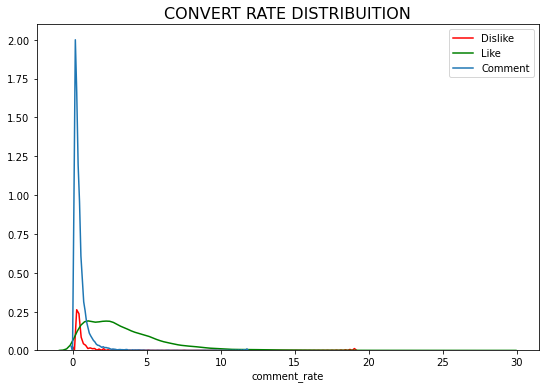

In [0]:
plt.figure(figsize = (9,6))

g1 = sns.distplot(df_US['dislike_rate'], color='red',hist=False, label="Dislike")
g1 = sns.distplot(df_US['like_rate'], color='green',hist=False, label="Like")
g1 = sns.distplot(df_US['comment_rate'],hist=False,label="Comment")
g1.set_title('CONVERT RATE DISTRIBUITION', fontsize=16)
plt.legend()
plt.show()

Very meaningful distribuition! Like x Dislikes rate have interesting differences

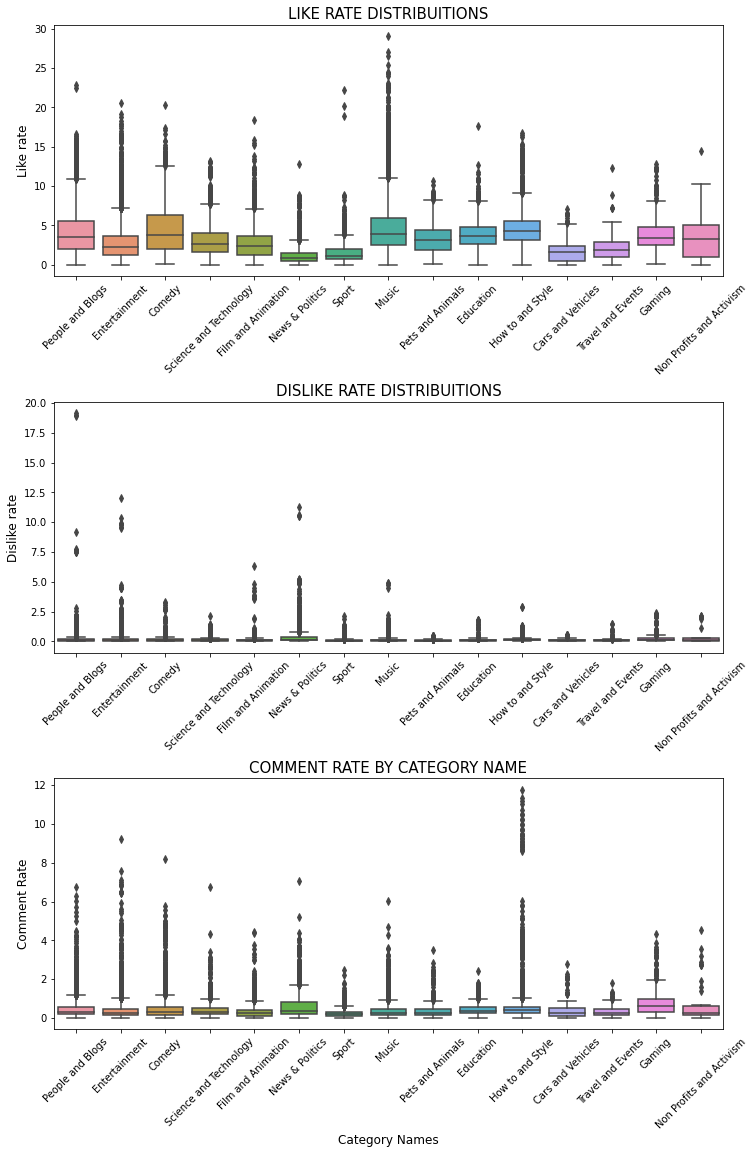

In [0]:
plt.figure(figsize = (12,18))

plt.subplot(311)
g= sns.boxplot(x='category_name',y='like_rate',  data=df_US)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("LIKE RATE DISTRIBUITIONS", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Like rate", fontsize=12)

plt.subplot(312)
g1= sns.boxplot(y='dislike_rate', x='category_name', data=df_US)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("DISLIKE RATE DISTRIBUITIONS", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Dislike rate", fontsize=12)

plt.subplot(313)
g2= sns.boxplot(y='comment_rate', x='category_name', data=df_US)
g2.set_xticklabels(g.get_xticklabels(),rotation=45)
g2.set_title("COMMENT RATE BY CATEGORY NAME", fontsize=15)
g2.set_xlabel("Category Names", fontsize=12)
g2.set_ylabel("Comment Rate", fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5,top = 0.9)

plt.show()

We can see that the Dislike rate is very low in almost all categories but some outliers in 'People and Blogs' and News & Politics that we can might can consider "Normal"

The mean of ike distribuition is less than 5% but in music we have a very interesting pattern of like rate... The music category have the highest engagement rate.

And at the Comment rate we can see the how-to category with the highest rates of commments. Interesting because isn't politics LOL

<h2>Looking through the anothers categoricals variables </h2>
We have the variables:
- Comments Disable
- Rating disable
- Video error


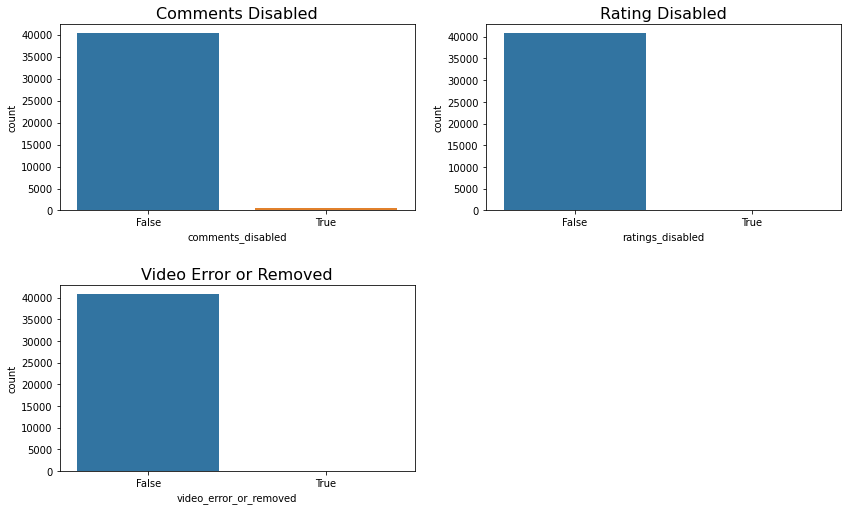

In [0]:
plt.figure(figsize = (14,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.subplot(2,2,1)
g = sns.countplot(x='comments_disabled', data=df_US)
g.set_title("Comments Disabled", fontsize=16)

plt.subplot(2,2,2)
g1 = sns.countplot(x='ratings_disabled', data=df_US)
g1.set_title("Rating Disabled", fontsize=16)

plt.subplot(2,2,3)
g2 = sns.countplot(x='video_error_or_removed', data=df_US)
g2.set_title("Video Error or Removed", fontsize=16)
plt.show()

<h2>Let's look the kde of this variables separated to deep understand them</h2>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


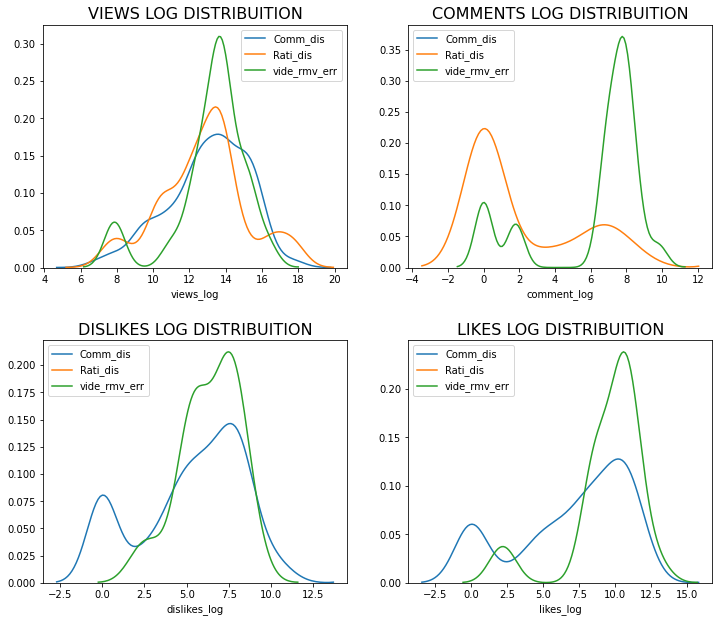

In [0]:
plt.figure(figsize = (12,10))

plt.subplot(221)
g1 = sns.distplot(df_US[df_US['comments_disabled'] == True]['views_log'], 
                  hist=False, label='Comm_dis')
g1 = sns.distplot(df_US[df_US['ratings_disabled'] == True]['views_log'], 
                  hist=False, label='Rati_dis')
g1 = sns.distplot(df_US[df_US['video_error_or_removed'] == True]['views_log'], 
                  hist=False, label='vide_rmv_err')
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df_US[df_US['comments_disabled'] == True]['comment_log'],
                  hist=False, label='Comm_dis')
g4 = sns.distplot(df_US[df_US['ratings_disabled'] == True]['comment_log'], 
                  hist=False, label='Rati_dis')
g4 = sns.distplot(df_US[df_US['video_error_or_removed'] == True]['comment_log'], 
                  hist=False, label='vide_rmv_err')
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df_US[df_US['comments_disabled'] == True]['dislikes_log'], 
                  hist=False, label='Comm_dis')
g3 = sns.distplot(df_US[df_US['ratings_disabled'] == True]['dislikes_log'], 
                  hist=False, label='Rati_dis')
g3 = sns.distplot(df_US[df_US['video_error_or_removed'] == True]['dislikes_log'], 
                  hist=False, label='vide_rmv_err')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df_US[df_US['comments_disabled'] == True]['likes_log'], 
                  hist=False, label='Comm_dis')
g2 = sns.distplot(df_US[df_US['ratings_disabled'] == True]['likes_log'], 
                  hist=False, label='Rati_dis')
g2 = sns.distplot(df_US[df_US['video_error_or_removed'] == True]['likes_log'], 
                  hist=False, label='vide_rmv_err')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3,top = 0.9)
plt.legend()
plt.show()

Removed videos no have some views until be moreved... <br>Rating disable and Comments disable have the same distribuition 

<h2>Analysing the Correlation Matrix of the numerical variables</h2>

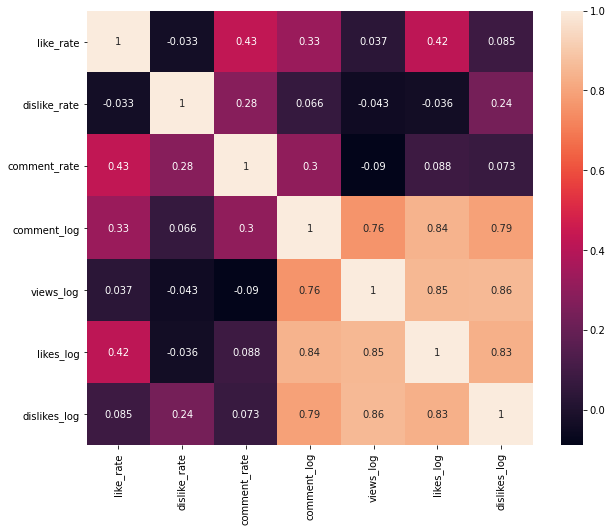

In [0]:
plt.figure(figsize = (10,8))

#Let's verify the correlation of each value
sns.heatmap(df_US[['like_rate', 'dislike_rate', 'comment_rate', 'comment_log',
         'views_log','likes_log','dislikes_log', "category_name"]].corr(), annot=True)
plt.show()

<h2>I will start creating some features from texts using Title and Tags columns</h2>

In [0]:
#nlp
import string
import re    #for regex
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
#Setting the stopwords
eng_stopwords = set(stopwords.words("english"))


In [0]:
#Word count in each comment:
df_US['count_word']=df_US["title"].apply(lambda x: len(str(x).split()))
df_US['count_word_tags']=df_US["tags"].apply(lambda x: len(str(x).split()))

#Unique word count
df_US['count_unique_word']=df_US["title"].apply(lambda x: len(set(str(x).split())))
df_US['count_unique_word_tags']=df_US["tags"].apply(lambda x: len(set(str(x).split())))

#Letter count
df_US['count_letters']=df_US["title"].apply(lambda x: len(str(x)))
df_US['count_letters_tags']=df_US["tags"].apply(lambda x: len(str(x)))

#punctuation count
df_US["count_punctuations"] =df_US["title"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_US["count_punctuations_tags"] =df_US["tags"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df_US["count_words_upper"] = df_US["title"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
df_US["count_words_upper_tags"] = df_US["tags"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df_US["count_words_title"] = df_US["title"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
df_US["count_words_title_tags"] = df_US["tags"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df_US["count_stopwords"] = df_US["title"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
df_US["count_stopwords_tags"] = df_US["tags"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
df_US["mean_word_len"] = df_US["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_US["mean_word_len_tags"] = df_US["tags"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [0]:
#derived features
#Word count percent in each comment:
df_US['word_unique_percent']=df_US['count_unique_word']*100/df_US['count_word']
df_US['word_unique_percent_tags']=df_US['count_unique_word_tags']*100/df_US['count_word_tags']

#Punct percent in each comment:
df_US['punct_percent']=df_US['count_punctuations']*100/df_US['count_word']
df_US['punct_percent_tags']=df_US['count_punctuations_tags']*100/df_US['count_word_tags']

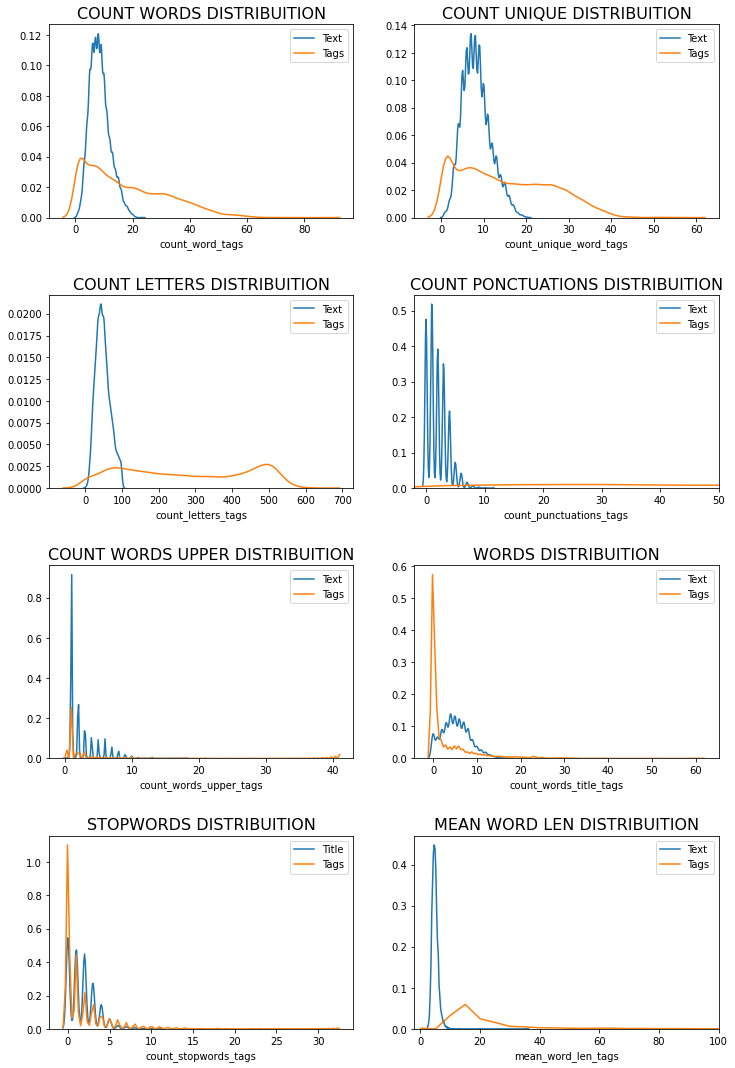

In [0]:
plt.figure(figsize = (12,18))

plt.subplot(421)
g1 = sns.distplot(df_US['count_word'], 
                  hist=False, label='Text')
g1 = sns.distplot(df_US['count_word_tags'], 
                  hist=False, label='Tags')
g1.set_title("COUNT WORDS DISTRIBUITION", fontsize=16)

plt.subplot(422)
g2 = sns.distplot(df_US['count_unique_word'],
                  hist=False, label='Text')
g2 = sns.distplot(df_US['count_unique_word_tags'], 
                  hist=False, label='Tags')
g2.set_title("COUNT UNIQUE DISTRIBUITION", fontsize=16)

plt.subplot(423)
g3 = sns.distplot(df_US['count_letters'], 
                  hist=False, label='Text')
g3 = sns.distplot(df_US['count_letters_tags'], 
                  hist=False, label='Tags')
g3.set_title("COUNT LETTERS DISTRIBUITION", fontsize=16)

plt.subplot(424)
g4 = sns.distplot(df_US["count_punctuations"], 
                  hist=False, label='Text')
g4 = sns.distplot(df_US["count_punctuations_tags"], 
                  hist=False, label='Tags')
g4.set_xlim([-2,50])
g4.set_title('COUNT PONCTUATIONS DISTRIBUITION', fontsize=16)

plt.subplot(425)
g5 = sns.distplot(df_US["count_words_upper"] , 
                  hist=False, label='Text')
g5 = sns.distplot(df_US["count_words_upper_tags"] , 
                  hist=False, label='Tags')
g5.set_title('COUNT WORDS UPPER DISTRIBUITION', fontsize=16)

plt.subplot(426)
g6 = sns.distplot(df_US["count_words_title"], 
                  hist=False, label='Text')
g6 = sns.distplot(df_US["count_words_title_tags"], 
                  hist=False, label='Tags')
g6.set_title('WORDS DISTRIBUITION', fontsize=16)

plt.subplot(427)
g7 = sns.distplot(df_US["count_stopwords"], 
                  hist=False, label='Title')
g7 = sns.distplot(df_US["count_stopwords_tags"], 
                  hist=False, label='Tags')
g7.set_title('STOPWORDS DISTRIBUITION', fontsize=16)

plt.subplot(428)
g8 = sns.distplot(df_US["mean_word_len"], 
                  hist=False, label='Text')
g8 = sns.distplot(df_US["mean_word_len_tags"], 
                  hist=False, label='Tags')
g8.set_xlim([-2,100])
g8.set_title('MEAN WORD LEN DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.legend()
plt.show()

<h2>Have the Punctuations title and tags any relation with views, likes, dislikes comments? </h2>

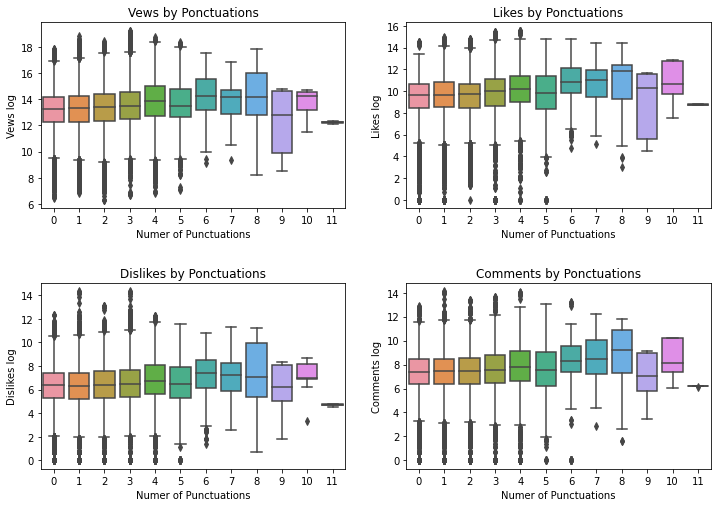

In [0]:
plt.figure(figsize = (12,8))

plt.subplot(221)
g=sns.boxplot(x='count_punctuations', y='views_log',data=df_US)
g.set_title("Vews by Ponctuations")
g.set_xlabel("Numer of Punctuations")
g.set_ylabel("Vews log")

plt.subplot(222)
g1 = sns.boxplot(x='count_punctuations', y='likes_log',data=df_US)
g1.set_title("Likes by Ponctuations")
g1.set_xlabel("Numer of Punctuations")
g1.set_ylabel("Likes log")

plt.subplot(223)
g2 = sns.boxplot(x='count_punctuations', y='dislikes_log',data=df_US)
g2.set_title("Dislikes by Ponctuations")
g2.set_xlabel("Numer of Punctuations")
g2.set_ylabel("Dislikes log")

plt.subplot(224)
g3 = sns.boxplot(x='count_punctuations', y='comment_log',data=df_US)
g3.set_title("Comments by Ponctuations")
g3.set_xlabel("Numer of Punctuations")
g3.set_ylabel("Comments log")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

<h2>The same view using Tags punctuations values</h2>

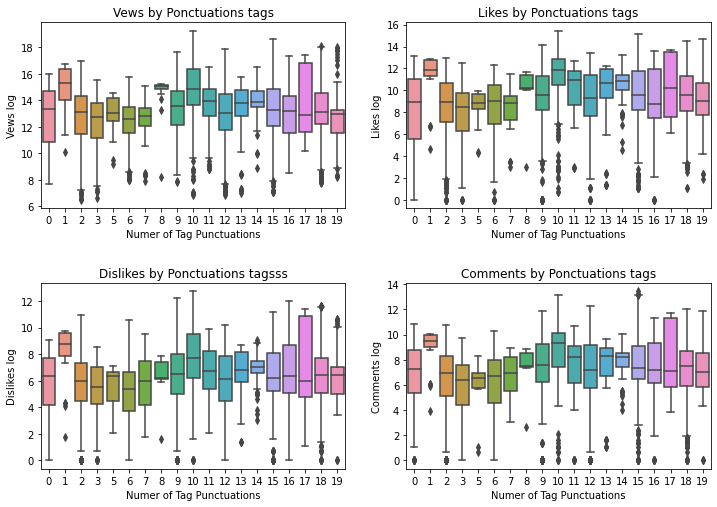

In [0]:
plt.figure(figsize = (12,8))

plt.subplot(221)
g=sns.boxplot(x='count_punctuations_tags', y='views_log',data=df_US[df_US['count_punctuations_tags'] < 20])
g.set_title("Vews by Ponctuations tags")
g.set_xlabel("Numer of Tag Punctuations")
g.set_ylabel("Vews log")

plt.subplot(222)
g1 = sns.boxplot(x='count_punctuations_tags', y='likes_log',data=df_US[df_US['count_punctuations_tags'] < 20])
g1.set_title("Likes by Ponctuations tags")
g1.set_xlabel("Numer of Tag Punctuations")
g1.set_ylabel("Likes log")

plt.subplot(223)
g2 = sns.boxplot(x='count_punctuations_tags', y='dislikes_log',data=df_US[df_US['count_punctuations_tags'] < 20])
g2.set_title("Dislikes by Ponctuations tagsss")
g2.set_xlabel("Numer of Tag Punctuations")
g2.set_ylabel("Dislikes log")

plt.subplot(224)
g3 = sns.boxplot(x='count_punctuations_tags', y='comment_log',data=df_US[df_US['count_punctuations_tags'] < 20])
g3.set_title("Comments by Ponctuations tags")
g3.set_xlabel("Numer of Tag Punctuations")
g3.set_ylabel("Comments log")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

<h2>Let's verify the correlation of title and tags values with views</h2>
- exploring the Correlation matrix to see if have any interesting relation

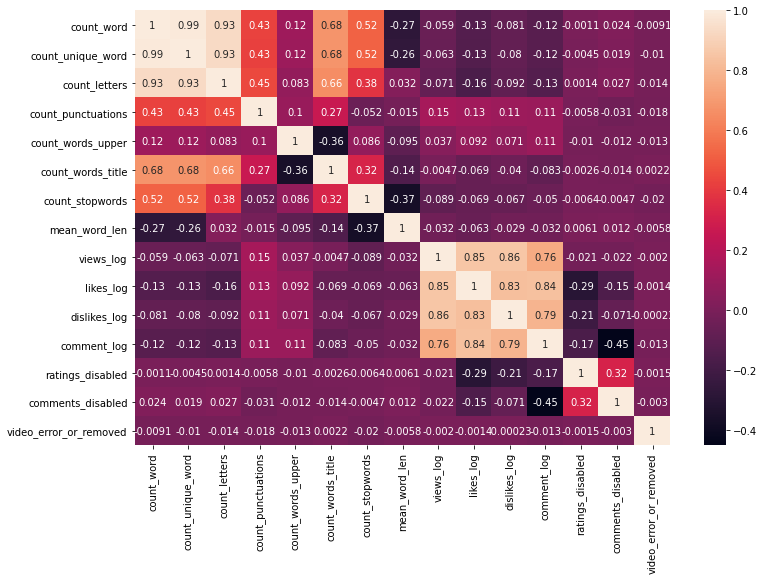

In [0]:
plt.figure(figsize = (12,8))

sns.heatmap(df_US[['count_word', 'count_unique_word','count_letters',
                     "count_punctuations","count_words_upper", "count_words_title", 
                     "count_stopwords","mean_word_len", 
                     'views_log', 'likes_log','dislikes_log','comment_log',
                     'ratings_disabled', 'comments_disabled', 'video_error_or_removed']].corr(), annot=True)
plt.show()

<h1>Visualizing  the Word Cloud of Tagged videos </h1>
- Ratings Disable 
- Comments Disable
- Video Error or Removed

In [0]:
mpl.rcParams['font.size']= 15              
mpl.rcParams['savefig.dpi']= 100         
mpl.rcParams['figure.subplot.bottom']= .1 

<h3>Rating Disabled</h3>

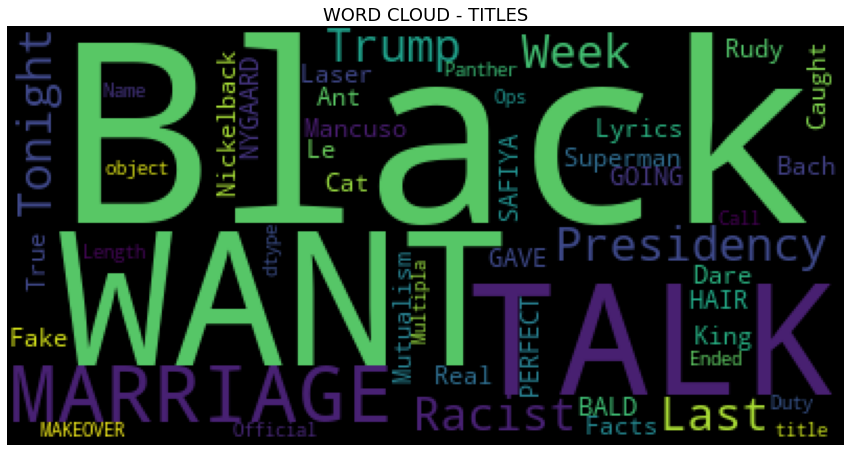

In [0]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_US['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

<h3>Comments Disabled</h3>

<h2>General Title Word Cloud</h2>

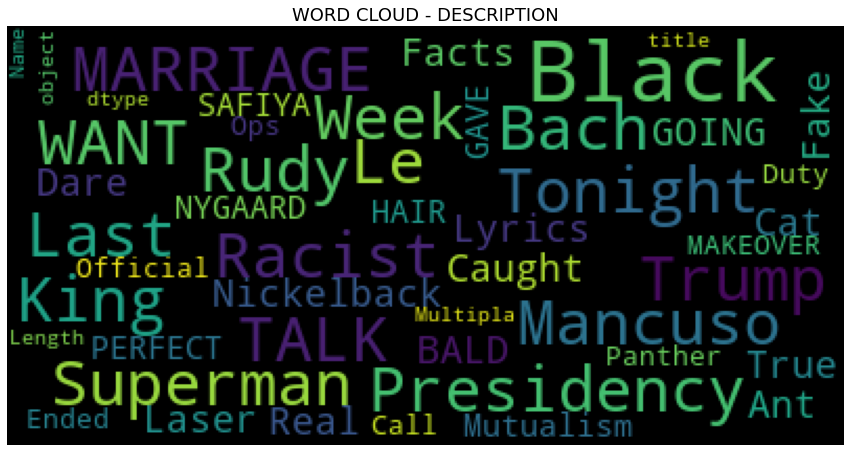

In [0]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_US['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()

<h1>Visualizing the WordCloud of Description</h1>

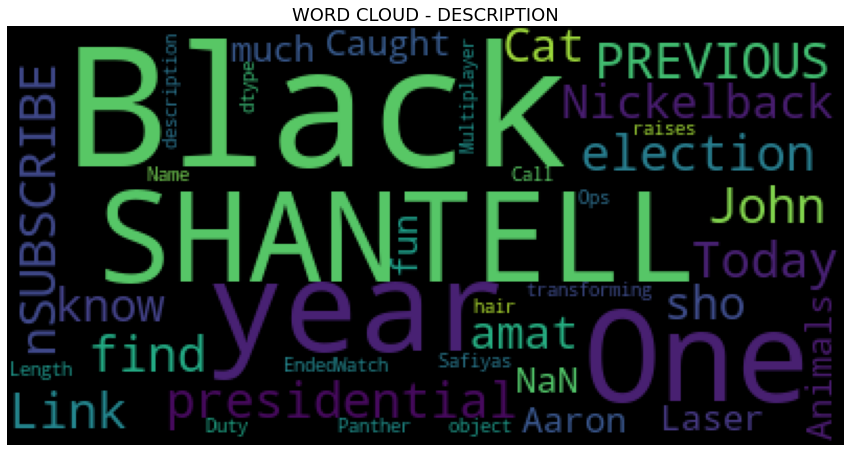

In [0]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

newStopWords= ['https', 'youtube', 'VIDEO','youtu','CHANNEL', 'WATCH']

stopwords.update(newStopWords)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=80, 
                          random_state=42
                         ).generate(str(df_US['description']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()


<h1>Analysing the Wordcloud of Tags</h1>

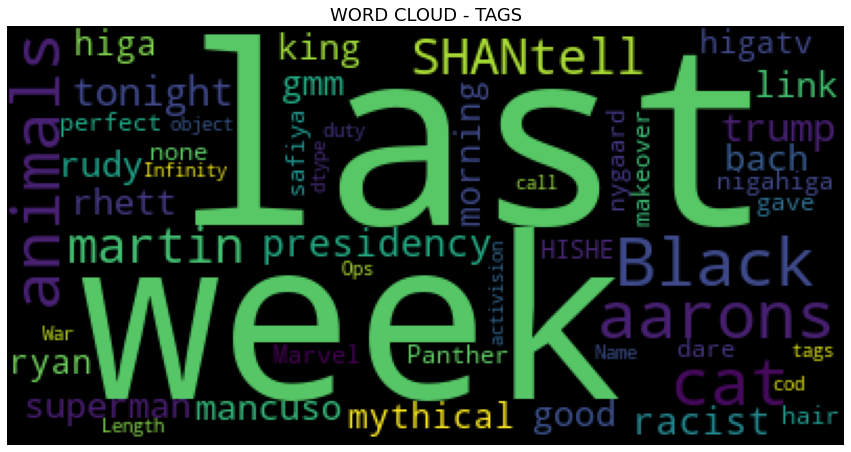

In [0]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_US['tags']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show()

I will continue implementing this analysis because I want learn about text data! <br>

Thank you very much for your view and <b> votes up</b> my kernel 

In [0]:
df_US['publish_time'] = pd.to_datetime(df_US['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

Category Name count
5     6681
2     6207
12    6182
3     6175
1     5502
Name: month, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


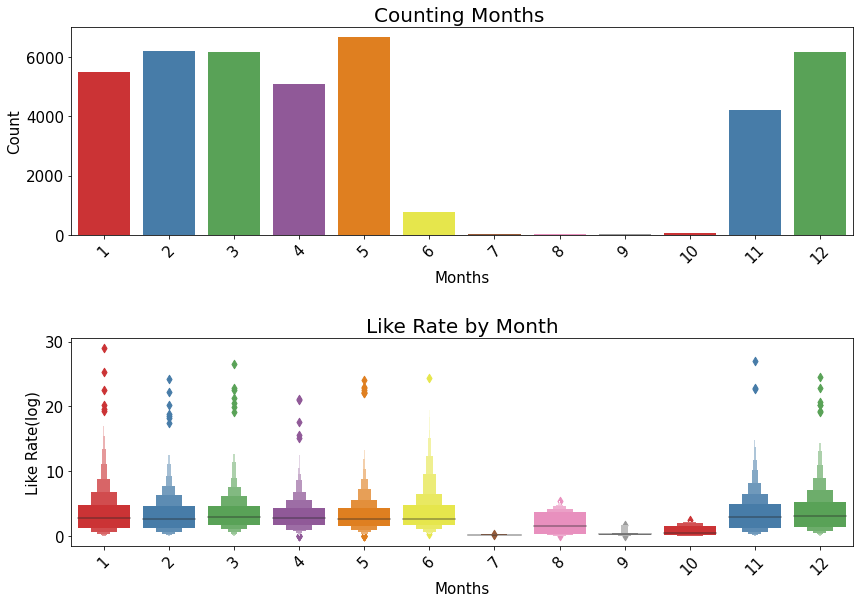

In [0]:
df_US['month'] = df_US['publish_time'].dt.month

print("Category Name count")
print(df_US['month'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('month', data=df_US, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Months ", fontsize=20)
g.set_xlabel("Months", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)
g1 = sns.lvplot(x='month', y='like_rate', data=df_US, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Month", fontsize=20)
g1.set_xlabel("Months", fontsize=15)
g1.set_ylabel("Like Rate(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

## Let's extract the hour value of datetime'

In [0]:
# separates date and time into two columns from 'publish_time' column
df_US.insert(4, 'publish_date', df_US['publish_time'].dt.date)
df_US['publish_time'] = df_US['publish_time'].dt.time
df_US[['hour','min','sec']] = df_US['publish_time'].astype(str).str.split(':', expand=True).astype(int)

## Knowning the Hour feature

TOP 5 Hour values
16    3669
15    3483
17    3447
18    2889
14    2807
Name: hour, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


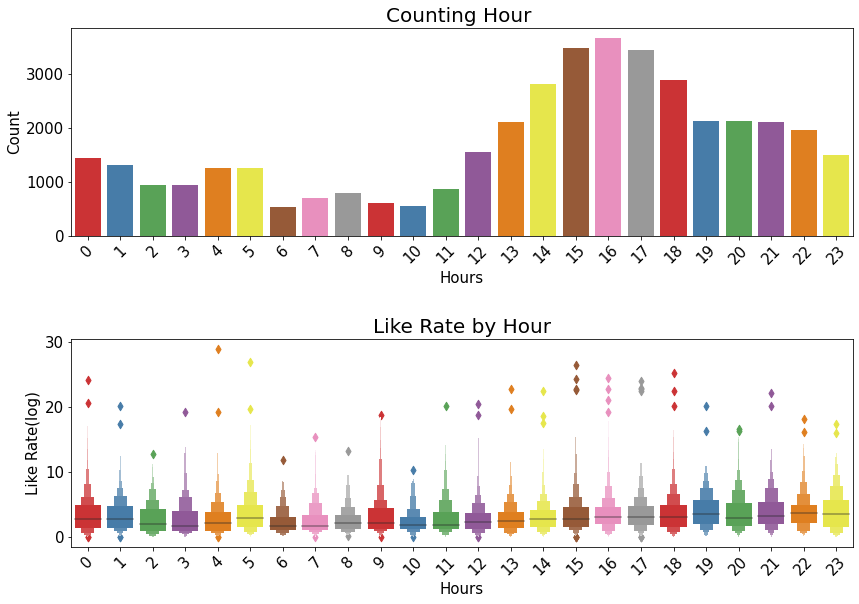

In [0]:
print("TOP 5 Hour values")
print(df_US['hour'].value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('hour', data=df_US, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting Hour ", fontsize=20)
g.set_xlabel("Hours", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.subplot(212)
g1 = sns.lvplot(x='hour', y='like_rate', data=df_US, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Like Rate by Hour", fontsize=20)
g1.set_xlabel("Hours", fontsize=15)
g1.set_ylabel("Like Rate(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()